## load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'D:\ProgrammingProjects\MatlabProjects\ZC_codes\DataWN.txt', delimiter='\t')

In [3]:
df.head()

,581.258516793787,583.37514892091,585.49126753438,587.606872810375,589.721964924986,591.836544054237,593.95061037405,596.064164060292,598.177205288728,600.289734235063,...,3003.96222064873,3005.52481426769,3007.08707229862,3008.64899484156,3010.21058199655,3011.77183386358,3013.33275054258,3014.89333213347,3016.45357873609,Unnamed: 1340
0,2,4,310,357,364,362,353,338,350,358,...,352,322,326,337,330,338,334,322,348,NaN
1,10,9,338,374,346,357,352,369,347,358,...,309,326,331,340,335,330,312,327,338,NaN
2,6,10,354,350,337,356,344,357,367,352,...,318,327,331,330,319,319,335,325,329,NaN
3,6,7,365,353,334,347,350,351,352,348,...,315,327,318,326,313,324,328,315,339,NaN
4,6,5,361,346,363,348,325,360,357,346,...,324,330,328,310,314,311,318,309,324,NaN


In [4]:
D = df.iloc[:, :-1].to_numpy()
D.shape # 200, 53

(10600, 1340)

In [5]:
wave = df.columns[:-1].to_numpy()

In [6]:
for i in range(wave.shape[0]):
    wave[i] = eval(wave[i])

In [9]:
for index, temp in enumerate(wave):
    print(index, temp)

0 581.258516793787
1 583.37514892091
2 585.49126753438
3 587.606872810375
4 589.721964924986
5 591.836544054237
6 593.95061037405
7 596.064164060292
8 598.177205288728
9 600.289734235063
10 602.401751074896
11 604.51325598378
12 606.624249137156
13 608.734730710406
14 610.84470087881
15 612.954159817589
16 615.063107701884
17 617.171544706744
18 619.279471007139
19 621.386886777971
20 623.493792194051
21 625.600187430107
22 627.7060726608
23 629.811448060715
24 631.916313804333
25 634.020670066082
26 636.124517020293
27 638.227854841225
28 640.330683703058
29 642.433003779886
30 644.534815245737
31 646.636118274546
32 648.736913040175
33 650.837199716407
34 652.936978476948
35 655.036249495417
36 657.135012945364
37 659.233269000251
38 661.331017833461
39 663.428259618315
40 665.52499452803
41 667.621222735765
42 669.716944414587
43 671.812159737492
44 673.906868877395
45 676.001072007126
46 678.094769299449
47 680.187960927044
48 682.280647062507
49 684.37282787836
50 686.464503547049

1051 2552.85328055591
1052 2554.51392711189
1053 2556.17420842794
1054 2557.83412461605
1055 2559.49367578815
1056 2561.15286205611
1057 2562.81168353177
1058 2564.47014032692
1059 2566.12823255332
1060 2567.78596032265
1061 2569.44332374657
1062 2571.1003229367
1063 2572.75695800459
1064 2574.41322906177
1065 2576.06913621971
1066 2577.72467958983
1067 2579.37985928352
1068 2581.03467541211
1069 2582.6891280869
1070 2584.34321741913
1071 2585.99694352001
1072 2587.65030650069
1073 2589.30330647228
1074 2590.95594354584
1075 2592.6082178324
1076 2594.26012944293
1077 2595.91167848837
1078 2597.5628650796
1079 2599.21368932745
1080 2600.86415134272
1081 2602.51425123617
1082 2604.1639891185
1083 2605.81336510037
1084 2607.46237929239
1085 2609.11103180513
1086 2610.75932274912
1087 2612.40725223485
1088 2614.05482037273
1089 2615.70202727318
1090 2617.34887304653
1091 2618.99535780308
1092 2620.64148165309
1093 2622.28724470677
1094 2623.9326470743
1095 2625.57768886578
1096 2627.222370

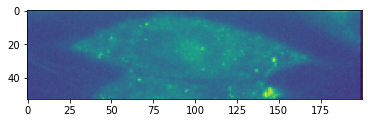

In [7]:
plt.imshow(D[:, 1265].reshape(-1, 200))

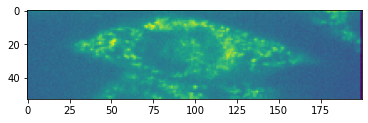

In [8]:
plt.imshow(D[:, 81].reshape(-1, 200))

In [9]:
init_C = np.c_[D[:, 1265], D[:, 81]]

In [10]:
init_C.shape

(10600, 2)

## FA analysis

In [25]:
from sklearn.decomposition import FactorAnalysis

In [26]:
transformer = FactorAnalysis(n_components=10, random_state=0)

In [27]:
D_transformed = transformer.fit_transform(D)

In [28]:
D_transformed.shape

(10600, 10)

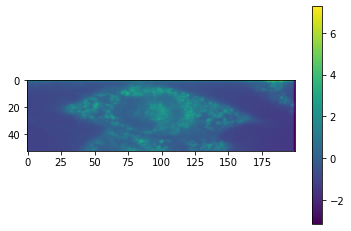

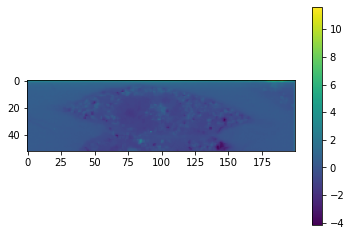

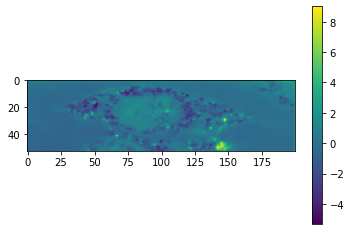

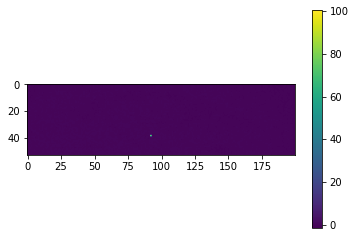

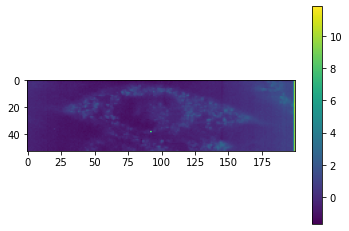

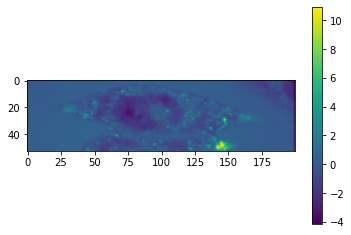

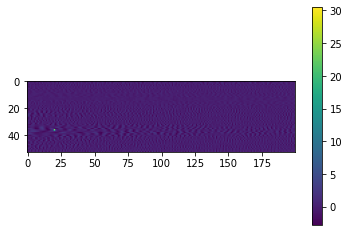

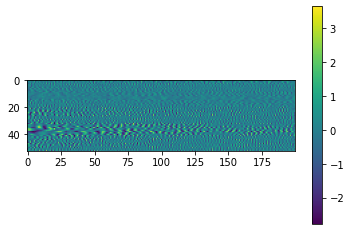

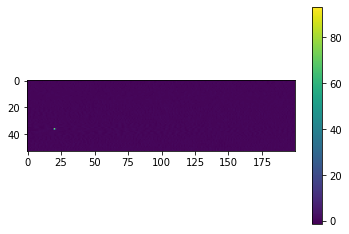

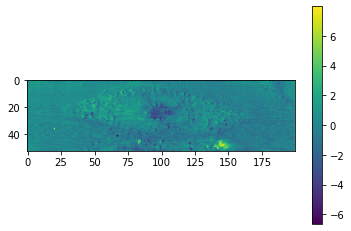

In [50]:
for i in range(10):
    plt.figure()
    plt.imshow(D_transformed[:, i].reshape(-1, 200))
    plt.colorbar()

In [ ]:
init_C = np.c_[D_transformed[:, [0, 1, 2, 4, 5]]]

## MCR analysis

In [37]:
import sys

import numpy as np
import logging

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 100

# importing pymcr pieces
from pymcr.mcr import McrAR

In [38]:
logger = logging.getLogger('pymcr')

logger.setLevel(logging.DEBUG)

# StdOut is a "stream"; thus, StreamHandler
stdout_handler = logging.StreamHandler(stream=sys.stdout)

# Set the message format. Simple and removing log level or date info
stdout_format = logging.Formatter('%(message)s')  # Just a basic message akin to print statements
stdout_handler.setFormatter(stdout_format)

logger.addHandler(stdout_handler)

In [39]:
from pymcr.regressors import OLS, NNLS
from pymcr.constraints import ConstraintNonneg, ConstraintNorm

from sklearn.linear_model.ridge import Ridge

In [43]:
mcrar = McrAR(c_constraints=[ConstraintNonneg()])
# mcrar = McrAR(max_iter=100, tol_increase=1e2,
#                 c_constraints=[ConstraintNonneg(), ConstraintNorm()])
# mcrar.fit(D, ST=initial_spectra, verbose=True)
mcrar.fit(D, C=init_C, verbose=True)
print('\nFinal MSE: {:.7e}'.format(mcrar.err[-1]))

Iter: 1 (ST)	mse: 3.4766e+04
Iter: 1 (ST)	mse: 3.4766e+04
Iter: 2 (C)	mse: 8.7328e+03
Iter: 2 (C)	mse: 8.7328e+03
Iter: 2 (ST)	mse: 2.2487e+03
Iter: 2 (ST)	mse: 2.2487e+03
Iter: 3 (C)	mse: 8.5956e+02
Iter: 3 (C)	mse: 8.5956e+02
Iter: 3 (ST)	mse: 5.7829e+02
Iter: 3 (ST)	mse: 5.7829e+02
Iter: 4 (C)	mse: 3.1531e+02
Iter: 4 (C)	mse: 3.1531e+02
Iter: 4 (ST)	mse: 2.2156e+02
Iter: 4 (ST)	mse: 2.2156e+02
Iter: 5 (C)	mse: 1.6546e+02
Iter: 5 (C)	mse: 1.6546e+02
Iter: 5 (ST)	mse: 1.3564e+02
Iter: 5 (ST)	mse: 1.3564e+02
Iter: 6 (C)	mse: 1.1693e+02
Iter: 6 (C)	mse: 1.1693e+02
Iter: 6 (ST)	mse: 1.0563e+02
Iter: 6 (ST)	mse: 1.0563e+02
Iter: 7 (C)	mse: 9.8700e+01
Iter: 7 (C)	mse: 9.8700e+01
Iter: 7 (ST)	mse: 9.3870e+01
Iter: 7 (ST)	mse: 9.3870e+01
Iter: 8 (C)	mse: 9.0614e+01
Iter: 8 (C)	mse: 9.0614e+01
Iter: 8 (ST)	mse: 8.8186e+01
Iter: 8 (ST)	mse: 8.8186e+01
Iter: 9 (C)	mse: 8.6391e+01
Iter: 9 (C)	mse: 8.6391e+01
Iter: 9 (ST)	mse: 8.5000e+01
Iter: 9 (ST)	mse: 8.5000e+01
Iter: 10 (C)	mse: 8.3906e+01
I

In [45]:
mcrar.ST_opt_.shape

(5, 1340)

In [46]:
mcrar.C_opt_.shape

(10600, 5)

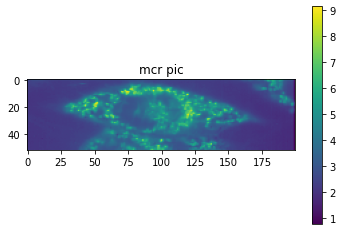

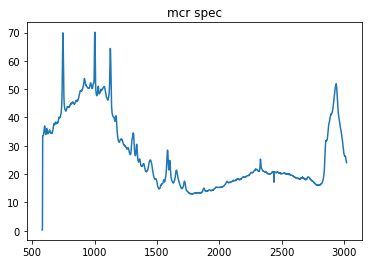

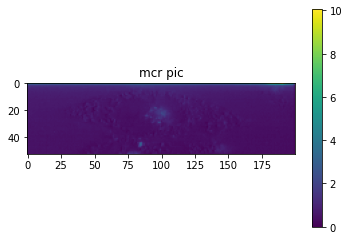

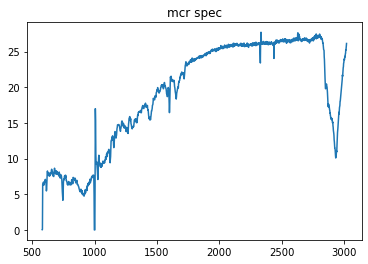

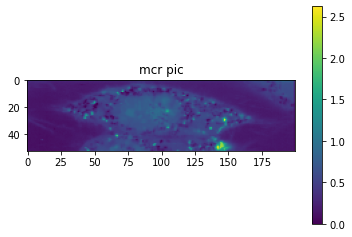

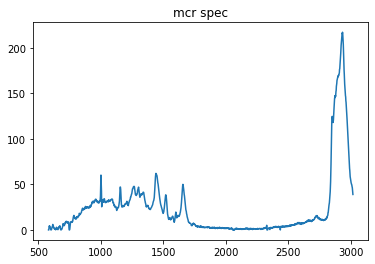

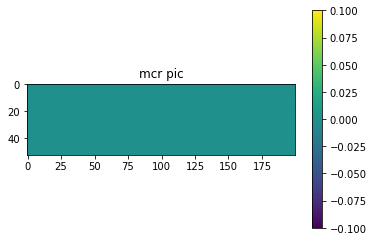

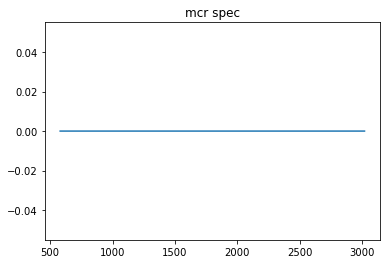

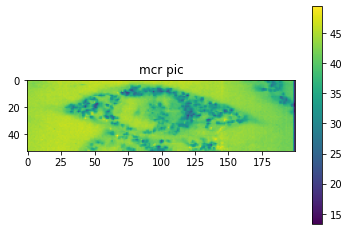

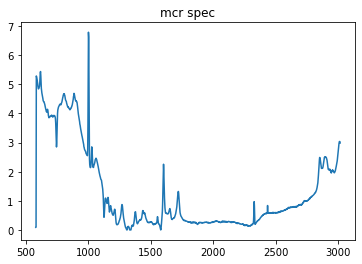

In [53]:
for i in range(mcrar.C_opt_.shape[1]):
    plt.figure()
    plt.imshow(mcrar.C_opt_[:, i].reshape(-1, 200))
    plt.title('mcr pic')
    plt.colorbar()
    plt.figure()
    plt.plot(wave, mcrar.ST_opt_[i, :])
    plt.title('mcr spec')
